# Weather in Norway
This code retrieves, parse_dlys and plots weather data from different weather stations in Norway 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp
import urllib.request

### 1. Getting data from FTP using request

Using request library to retrieve data from U.S. NOAA Climate Data Online service and specifically from URLs 
https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/

 - Retrieving metada with information about DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY), how to download the data, contents and formats of data files
 - Retrieving stations.txt that contains list of stations and their metadata (e.g., coordinates)
 - Retrieving .dly files which is the data Global Surface Network (GSN)
 - Retrieving ghcnd-countries.txt with country codes

In [2]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt','readme.txt')
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd_gsn.tar.gz','ghcnd_gsn.tar.gz')
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-countries.txt','ghcnd-countries.txt')

('ghcnd-countries.txt', <email.message.Message at 0x7f6420d70550>)

- Unzipping the data

In [3]:
!tar xzvf ghcnd_gsn.tar.gz

ghcnd_gsn/
ghcnd_gsn/AE000041196.dly
ghcnd_gsn/AF000040930.dly
ghcnd_gsn/AG000060390.dly
ghcnd_gsn/AG000060590.dly
ghcnd_gsn/AG000060611.dly
ghcnd_gsn/AG000060680.dly
ghcnd_gsn/AJ000037989.dly
ghcnd_gsn/ALM00013615.dly
ghcnd_gsn/AM000037781.dly
ghcnd_gsn/AO000066160.dly
ghcnd_gsn/AO000066270.dly
ghcnd_gsn/AO000066390.dly
ghcnd_gsn/AO000066410.dly
ghcnd_gsn/AO000066422.dly
ghcnd_gsn/AO000066447.dly
ghcnd_gsn/AQW00061705.dly
ghcnd_gsn/AR000087007.dly
ghcnd_gsn/AR000087065.dly
ghcnd_gsn/AR000087078.dly
ghcnd_gsn/AR000087155.dly
ghcnd_gsn/AR000087217.dly
ghcnd_gsn/AR000087257.dly
ghcnd_gsn/AR000087270.dly
ghcnd_gsn/AR000087344.dly
ghcnd_gsn/AR000087374.dly
ghcnd_gsn/AR000087418.dly
ghcnd_gsn/AR000087534.dly
ghcnd_gsn/AR000087623.dly
ghcnd_gsn/AR000087692.dly
ghcnd_gsn/AR000087715.dly
ghcnd_gsn/AR000087803.dly
ghcnd_gsn/AR000087828.dly
ghcnd_gsn/AR000087860.dly
ghcnd_gsn/AR000087925.dly
ghcnd_gsn/AR000870470.dly
ghcnd_gsn/AR000873050.dly
ghcnd_gsn/AR000875440.dly
ghcnd_gsn/AR000877500.dly
g

ghcnd_gsn/CI000085442.dly
ghcnd_gsn/CI000085469.dly
ghcnd_gsn/CI000085488.dly
ghcnd_gsn/CI000085543.dly
ghcnd_gsn/CI000085585.dly
ghcnd_gsn/CI000085629.dly
ghcnd_gsn/CI000085743.dly
ghcnd_gsn/CI000085799.dly
ghcnd_gsn/CI000085874.dly
ghcnd_gsn/CI000085934.dly
ghcnd_gsn/CJW00011813.dly
ghcnd_gsn/CK000096996.dly
ghcnd_gsn/CM000064870.dly
ghcnd_gsn/CO000080001.dly
ghcnd_gsn/CO000080222.dly
ghcnd_gsn/CO000080259.dly
ghcnd_gsn/CO000080342.dly
ghcnd_gsn/CS000081003.dly
ghcnd_gsn/CUM00078310.dly
ghcnd_gsn/CUM00078325.dly
ghcnd_gsn/CUM00078355.dly
ghcnd_gsn/CUM00078369.dly
ghcnd_gsn/CVM00008583.dly
ghcnd_gsn/CWM00091843.dly
ghcnd_gsn/CY000176090.dly
ghcnd_gsn/DA000030380.dly
ghcnd_gsn/DAM00006011.dly
ghcnd_gsn/EC000000006.dly
ghcnd_gsn/ECM00084008.dly
ghcnd_gsn/ECM00084088.dly
ghcnd_gsn/ECM00084270.dly
ghcnd_gsn/EG000062306.dly
ghcnd_gsn/EG000062414.dly
ghcnd_gsn/EG000062417.dly
ghcnd_gsn/EG000062463.dly
ghcnd_gsn/EG000624200.dly
ghcnd_gsn/EGM00062378.dly
ghcnd_gsn/EGM00062435.dly
ghcnd_gsn/EI

ghcnd_gsn/RMW00040710.dly
ghcnd_gsn/ROM00015085.dly
ghcnd_gsn/ROM00015280.dly
ghcnd_gsn/ROM00015360.dly
ghcnd_gsn/RP000098232.dly
ghcnd_gsn/RP000098430.dly
ghcnd_gsn/RP000098444.dly
ghcnd_gsn/RP000098755.dly
ghcnd_gsn/RP000098836.dly
ghcnd_gsn/RP000098851.dly
ghcnd_gsn/RQW00011641.dly
ghcnd_gsn/RSM00020046.dly
ghcnd_gsn/RSM00020069.dly
ghcnd_gsn/RSM00020087.dly
ghcnd_gsn/RSM00020292.dly
ghcnd_gsn/RSM00020667.dly
ghcnd_gsn/RSM00020674.dly
ghcnd_gsn/RSM00020744.dly
ghcnd_gsn/RSM00020891.dly
ghcnd_gsn/RSM00020982.dly
ghcnd_gsn/RSM00021432.dly
ghcnd_gsn/RSM00021802.dly
ghcnd_gsn/RSM00021921.dly
ghcnd_gsn/RSM00021931.dly
ghcnd_gsn/RSM00021946.dly
ghcnd_gsn/RSM00021982.dly
ghcnd_gsn/RSM00022113.dly
ghcnd_gsn/RSM00022165.dly
ghcnd_gsn/RSM00022217.dly
ghcnd_gsn/RSM00022471.dly
ghcnd_gsn/RSM00022520.dly
ghcnd_gsn/RSM00022550.dly
ghcnd_gsn/RSM00022802.dly
ghcnd_gsn/RSM00022837.dly
ghcnd_gsn/RSM00023074.dly
ghcnd_gsn/RSM00023205.dly
ghcnd_gsn/RSM00023330.dly
ghcnd_gsn/RSM00023383.dly
ghcnd_gsn/RS

ghcnd_gsn/UZM00038413.dly
ghcnd_gsn/UZM00038457.dly
ghcnd_gsn/VE000080405.dly
ghcnd_gsn/VE000080423.dly
ghcnd_gsn/VE000080425.dly
ghcnd_gsn/VE000080438.dly
ghcnd_gsn/VE000080450.dly
ghcnd_gsn/VE000080453.dly
ghcnd_gsn/VE000080462.dly
ghcnd_gsn/VM000048900.dly
ghcnd_gsn/VMM00048855.dly
ghcnd_gsn/WA004191820.dly
ghcnd_gsn/WA006490640.dly
ghcnd_gsn/WA007401540.dly
ghcnd_gsn/WA010101860.dly
ghcnd_gsn/WF000917530.dly
ghcnd_gsn/ZA000067441.dly
ghcnd_gsn/ZA000067475.dly
ghcnd_gsn/ZA000067581.dly
ghcnd_gsn/ZA000067633.dly
ghcnd_gsn/ZA000067743.dly
ghcnd_gsn/ZI000067775.dly
ghcnd_gsn/ZI000067964.dly
ghcnd_gsn/ZI000067983.dly
ghcnd-version.txt


stations.txt header is code, latitude, longitude, elevation, name, GSN flag, World Meteorological Organization ID 

In [4]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

### Function to make a dictionary only with metadata of stations

In [5]:
def get_stations():
    open('stations.txt','r').readlines()[:10]
    stations = {}

    for line in open('stations.txt','r'):  ## read every line of stations
        if 'GSN' in line:
            fields = line.split()
            stations[fields[0]] = ' '.join(fields[4:])
    return stations

In [6]:
get_stations()

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
 'AF000040930': 'NORTH-SALANG GSN 40930',
 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
 'AG000060590': 'EL-GOLEA GSN 60590',
 'AG000060611': 'IN-AMENAS GSN 60611',
 'AG000060680': 'TAMANRASSET GSN 60680',
 'AJ000037989': 'ASTARA GSN 37989',
 'ALM00013615': 'TIRANA RINAS GSN 13615',
 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
 'AO000066160': 'LUANDA GSN 66160',
 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
 'AO000066422': 'MOCAMEDES GSN 66422',
 'AO000066447': 'MAVINGA GSN 66447',
 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
 'AR000087065': 'RIVADAVIA GSN 87065',
 'AR000087078': 'LAS LOMITAS GSN 87078',
 'AR000087155': 'RESISTENCIA AERO GSN 87155',
 'AR000087217': 'LA RIOJA AERO. GSN 87217',
 'AR000087257': 'CERES AERO GSN 87257',
 'AR000087270': 'RECONQUISTA AERO GSN 87270',
 'AR

### Function to find station knowing the name

In [7]:
def findstation(s):
    found = {code: name for code,name in get_stations().items() if s in name}
    print(found)

In [8]:
findstation('TROMSO')

{'NO000001026': 'TROMSO GSN 01026'}


### Function to find stations knowing the country code

Opening the ghcnd-countries.txt to find the norwegian code

In [9]:
open('ghcnd-countries.txt','r').readlines()[:10]

['AC Antigua and Barbuda \n',
 'AE United Arab Emirates \n',
 'AF Afghanistan\n',
 'AG Algeria \n',
 'AJ Azerbaijan \n',
 'AL Albania\n',
 'AM Armenia \n',
 'AO Angola \n',
 'AQ American Samoa [United States] \n',
 'AR Argentina \n']

In [10]:
def findstation_country(s):
    found_country = {code: name for code,name in get_stations().items() if code.startswith(s)}
    print(found_country)

In [11]:
findstation_country('NO')

{'NO000001026': 'TROMSO GSN 01026', 'NO000001212': 'ONA HUSOY GSN 01212', 'NO000001465': 'TORUNGEN FYR GSN 01465', 'NO000011520': 'BODO VI GSN 01152', 'NO000014030': 'UTSIRA FYR GSN 01403', 'NO000098550': 'VARDO GSN 01098', 'NO000099710': 'BJOERNOEYA GSN 01028', 'NOM00001238': 'FOKSTUA GSN 01238'}


Making a list of all stations in Norway

Opening the first 10 lines of the dly file

In [12]:
r=open('NO000001026.dly','r').readlines()[:50]

In [13]:
r[0]

'NO000001026192007TMIN  104  E   82  E   90  E   72  E   57  E   81  E  140  E  130  E  141  E   87  E   91  E   77  E   84  E  106  E  101  E   99  E  113  E  105  E   93  E   69  E   61  E   62  E   80  E   82  E   93  E   85  E   81  E   72  E   66  E   73  E  111  E\n'

Opening the readme to read the format of the .dly data file

In [14]:
open('readme.txt','r').readlines()[98:121]

['\n',
 'III. FORMAT OF DATA FILES (".dly" FILES)\n',
 '\n',
 'Each ".dly" file contains data for one station.  The name of the file\n',
 'corresponds to a station\'s identification code.  For example, "USC00026481.dly"\n',
 'contains the data for the station with the identification code USC00026481).\n',
 '\n',
 'Each record in a file contains one month of daily data.  The variables on each\n',
 'line include the following:\n',
 '\n',
 '------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n']

### Function to parse the dly file

In [15]:
def parse_dly(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [16]:
dly_delimiter=[11,4,2,4]+[5,1,1,1]*31 #ID, year,month,element + value and flags
dly_usecols=[1,2,3]+[4*i for i in range(1,32)] #year, month, element, value 1 , value 2, ..., value 31
dly_dtype=[np.int32,np.int32,(np.str_,4)]+[np.int32]*31 #data types for year, month, element, value
dly_names=['year','month','obs']+[str(day) for day in range(1,31+1)]

In [17]:
tromso = parse_dly('NO000001026.dly')

In [18]:
tromso[0]

(1920, 7, 'TMIN', 104, 82, 90, 72, 57, 81, 140, 130, 141, 87, 91, 77, 84, 106, 101, 99, 113, 105, 93, 69, 61, 62, 80, 82, 93, 85, 81, 72, 66, 73, 111)

### Function to convert to format date, month and year

In [19]:
def date_format(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])
   

In [20]:
date_format(tromso[0])

array([('1920-07-01', 10.4), ('1920-07-02',  8.2), ('1920-07-03',  9. ),
       ('1920-07-04',  7.2), ('1920-07-05',  5.7), ('1920-07-06',  8.1),
       ('1920-07-07', 14. ), ('1920-07-08', 13. ), ('1920-07-09', 14.1),
       ('1920-07-10',  8.7), ('1920-07-11',  9.1), ('1920-07-12',  7.7),
       ('1920-07-13',  8.4), ('1920-07-14', 10.6), ('1920-07-15', 10.1),
       ('1920-07-16',  9.9), ('1920-07-17', 11.3), ('1920-07-18', 10.5),
       ('1920-07-19',  9.3), ('1920-07-20',  6.9), ('1920-07-21',  6.1),
       ('1920-07-22',  6.2), ('1920-07-23',  8. ), ('1920-07-24',  8.2),
       ('1920-07-25',  9.3), ('1920-07-26',  8.5), ('1920-07-27',  8.1),
       ('1920-07-28',  7.2), ('1920-07-29',  6.6), ('1920-07-30',  7.3),
       ('1920-07-31', 11.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

### Function to gather the rows that contain a specific observation (TMIN, PRCP, SNWD..) from a station file

In [21]:
def getobs(filename,obs):
    data = np.concatenate([date_format(row) for row in parse_dly(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan #replace missing data for nan
    
    return data 

In [22]:
getobs('NO000001026.dly','TMIN')

array([('1920-07-01', 10.4), ('1920-07-02',  8.2), ('1920-07-03',  9. ),
       ..., ('2022-03-29',  nan), ('2022-03-30',  nan),
       ('2022-03-31',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [23]:
tromso_tmax = getobs('NO000001026.dly','TMAX')
tromso_tmin = getobs('NO000001026.dly','TMIN')

## Visualization

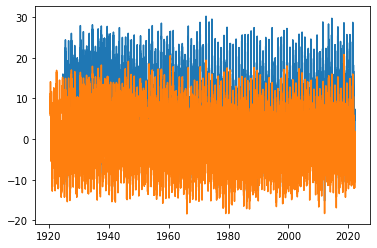

In [24]:
pp.plot(tromso_tmax['date'],tromso_tmax['value'])
pp.plot(tromso_tmin['date'],tromso_tmin['value'])

In [25]:
tromso_tmin['value'].mean()

nan

In [26]:
np.mean(tromso_tmin['value']), np.mean(tromso_tmax['value'])

(nan, nan)

### Function to interpolate missing data

In [27]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)   #converting to float
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan]) #interpolate missing data with neighbor values

In [28]:
fillnans(tromso_tmax)
fillnans(tromso_tmin)

In [29]:
type(tromso_tmin['value'])

numpy.ndarray

In [30]:
np.mean(tromso_tmin['value']), np.mean(tromso_tmax['value'])

(0.4580292756430955, 5.560723604837126)

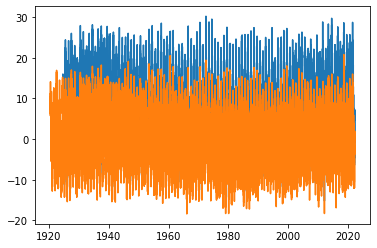

In [31]:
pp.plot(tromso_tmax['date'],tromso_tmax['value'])
pp.plot(tromso_tmin['date'],tromso_tmin['value'])

### Function to smooth the curves for better visualization

In [32]:
def plot_smoothed(t,win=10): #average smooth function
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

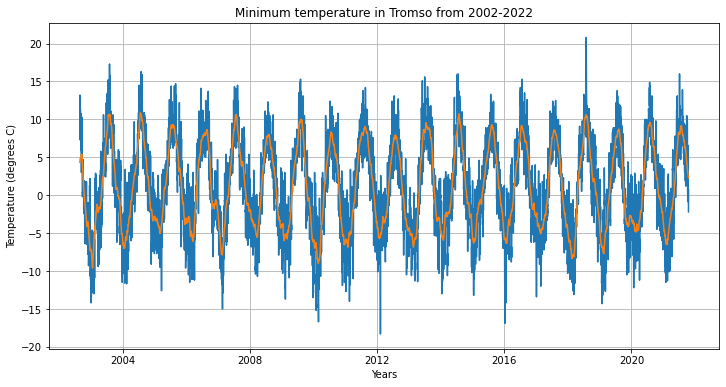

In [66]:
pp.figure(figsize=(12,6))
pp.plot(tromso_tmin[30000:37000]['date'],tromso_tmin[30000:37000]['value'])
plot_smoothed(tromso_tmin[30000:37000],50)
pp.title('Minimum temperature in Tromso from 2002-2022')
pp.ylabel('Temperature (degrees C)')
pp.xlabel('Years')
pp.grid(visible='True')

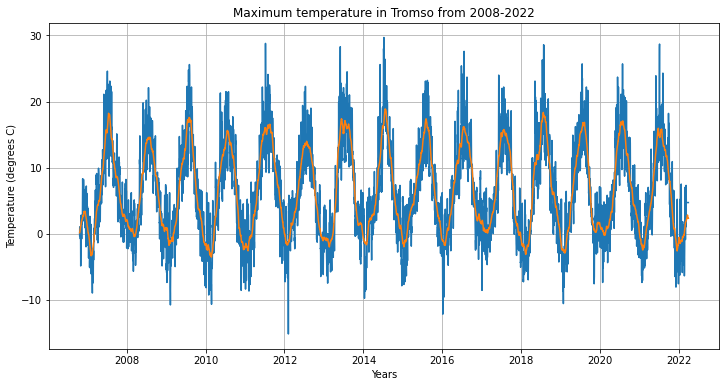

In [65]:
pp.figure(figsize=(12,6))
pp.plot(tromso_tmax[30000:37000]['date'],tromso_tmax[30000:37000]['value'])
plot_smoothed(tromso_tmax[30000:37000],50)
pp.title('Maximum temperature in Tromso from 2008-2022')
pp.ylabel('Temperature (degrees C)')
pp.xlabel('Years')
pp.grid(visible='True')

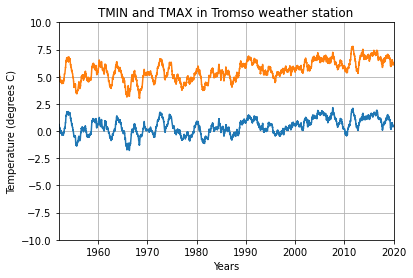

In [64]:
plot_smoothed(getobs('NO000001026.dly','TMIN'),365)
plot_smoothed(getobs('NO000001026.dly','TMAX'),365)

pp.title('TMIN and TMAX in Tromso weather station')
pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2020'),ymin=-10,ymax=10)
pp.ylabel('Temperature (degrees C)')
pp.xlabel('Years')
pp.grid(visible='True')
